In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import scipy


df = pd.read_excel('/content/Fault_BC.xlsx')
df2 = pd.read_excel('/content/Ideal.xlsx')

In [ ]:
df.shape

(10020, 4)

In [ ]:
df.isnull().sum()

A           0
B           0
C           0
Distance    0
dtype: int64

In [ ]:
df.head()

,A,B,C,Distance
0,-683.2417,-9886.5,10570.0,0
1,803.2039,-10617.0,9813.5,0
2,2272.4000,-11189.0,8916.6,0
3,3710.0000,-11584.0,7873.5,0
4,5088.4000,-11790.0,6701.9,0


In [ ]:
df['Va_error'] = np.abs(df['A']-df2['A'])
df['Vb_error'] = np.abs(df['B']-df2['B'])
df['Vc_error'] = np.abs(df['C']-df2['C'])

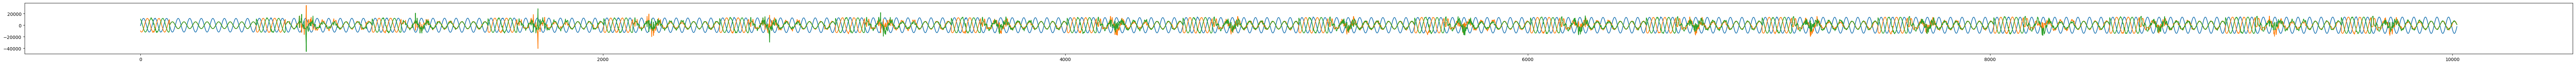

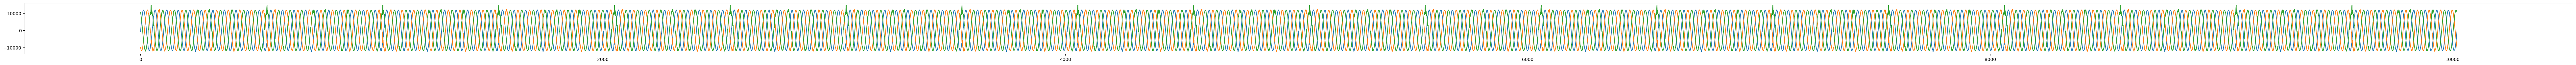

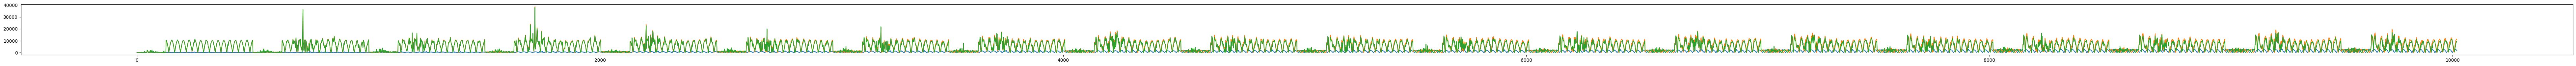

In [ ]:
plt.figure(figsize = (100,2))
plt.plot(df["A"]);
plt.plot(df["B"]);
plt.plot(df["C"]);

plt.figure(figsize = (100,2))
plt.plot(df2["A"]);
plt.plot(df2["B"]);
plt.plot(df2["C"]);

plt.figure(figsize = (100,2))
plt.plot(df["Va_error"]);
plt.plot(df["Vb_error"]);
plt.plot(df["Vc_error"]);

In [ ]:
#df['dVa_error']=df['Va_error'] -df['Va_error'].shift(8)
#df['dVb_error']=df['Vb_error'] -df['Vb_error'].shift(8)
#df['dVc_error']=df['Vc_error'] -df['Vc_error'].shift(8)

df['dVa_error']=df['Va_error']
df['dVb_error']=df['Vb_error']
df['dVc_error']=df['Vc_error']

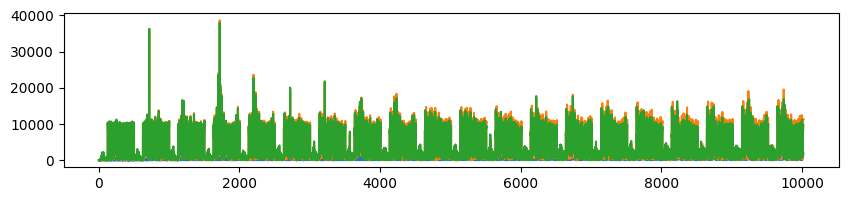

In [ ]:
plt.figure(figsize = (10,2))
plt.plot(df['dVa_error']);
plt.plot(df["dVb_error"]);
plt.plot(df["dVc_error"]);

In [ ]:
#fault_types = ['1001', '0101', '0011']
fault_types = df['Distance'].unique()
print(fault_types)

[  0  25  50  75 100 125 150 175 200 225 250 275 300 325 350 375 400 425
 450 475]


In [ ]:
expectation_values = {}

for fault_type in fault_types:
    expectation_values[f'{fault_type}_Va_expectation'] = df.loc[df['Distance'] == fault_type, 'dVa_error'].abs().mean()
    expectation_values[f'{fault_type}_Vb_expectation'] = df.loc[df['Distance'] == fault_type, 'dVb_error'].abs().mean()
    expectation_values[f'{fault_type}_Vc_expectation'] = df.loc[df['Distance'] == fault_type, 'dVc_error'].abs().mean()


#for key, value in expectation_values.items():
#    print(f"{key}: {value}")

0_Va_expectation: 104.56334530938122
0_Vb_expectation: 4953.195412774451
0_Vc_expectation: 4987.974815768463
25_Va_expectation: 194.33928582834332
25_Vb_expectation: 5014.079596007985
25_Vc_expectation: 4986.689575648702
50_Va_expectation: 328.71179840319354
50_Vb_expectation: 5097.899439520958
50_Vc_expectation: 5015.461070259481
75_Va_expectation: 454.06674710578847
75_Vb_expectation: 5563.530675449102
75_Vc_expectation: 5430.457196407186
100_Va_expectation: 583.192141516966
100_Vb_expectation: 5451.45454770459
100_Vc_expectation: 5254.871636726547
125_Va_expectation: 715.3328019960081
125_Vb_expectation: 5212.033369261477
125_Vc_expectation: 4968.407267664671
150_Va_expectation: 833.0395259481038
150_Vb_expectation: 5256.22799261477
150_Vc_expectation: 4967.774567065869
175_Va_expectation: 944.4277303393213
175_Vb_expectation: 5577.7675249501
175_Vc_expectation: 5217.216630938124
200_Va_expectation: 1050.467073253493
200_Vb_expectation: 5782.816709181637
200_Vc_expectation: 5397.821

In [ ]:
#Y_df = pd.DataFrame(Y_values.items(), columns=['Distance', 'Y_Value'])
#max_df = pd.DataFrame(max_values.items(), columns=['Distance', 'Max_Value'])
expectation_df = pd.DataFrame(expectation_values.items(), columns=['Distance', 'Error_Value'])

In [ ]:
expectation_df[['Fault_distance', 'Phase', 'dummy']] = expectation_df['Distance'].str.split('_', expand=True)
expectation_df.drop(['Distance','dummy'], axis=1, inplace=True)
expectation_df.head()

,Error_Value,Fault_distance,Phase
0,104.563345,0,Va
1,4953.195413,0,Vb
2,4987.974816,0,Vc
3,194.339286,25,Va
4,5014.079596,25,Vb


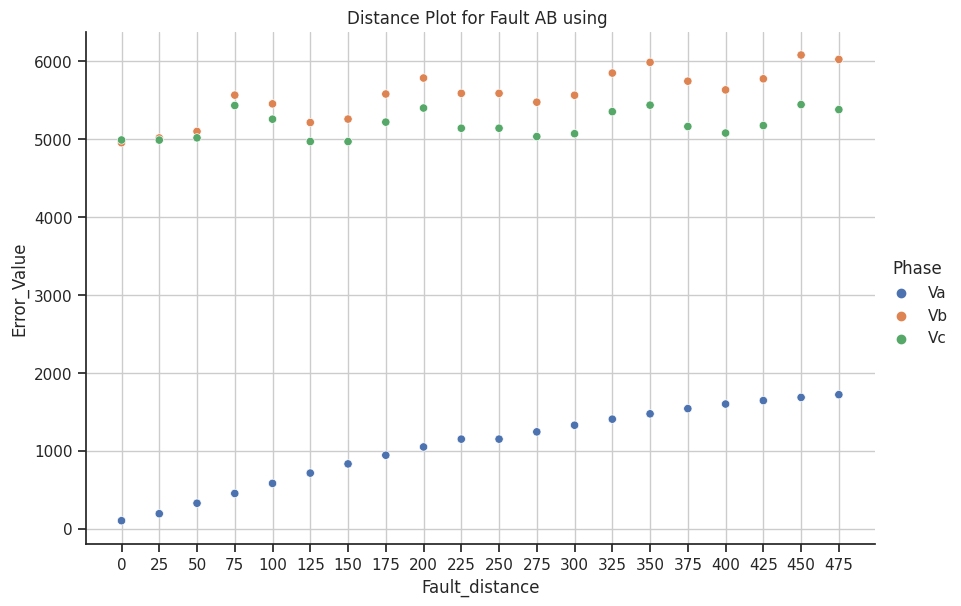

In [ ]:
import seaborn
seaborn.set(style='ticks')

_phases= ['Va', 'Vb', 'Vc']
seaborn.relplot(data=expectation_df, x = 'Fault_distance', y = 'Error_Value', hue='Phase', hue_order=_phases, aspect=1.5, height=6)
plt.title('Distance Plot for Fault')
plt.grid()
plt.show()

plt.ylabel('Mean Absolute Error', fontsize=10)
plt.xlabel('Distance from fault location (km)', fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid()
plt.savefig('Acc_plot.pdf', bbox_inches="tight")
plt.show()

